In [2]:
import networkx
import Graph

g = Graph.main()

Making paths from route: 3, var 5

Making paths from route: 3, var 6

Making paths from route: 1, var 1

Making paths from route: 1, var 2

Making paths from route: 7, var 13

Making paths from route: 7, var 14

Making paths from route: 4, var 7

Making paths from route: 4, var 8

Making paths from route: 6, var 1

Making paths from route: 6, var 2

Making paths from route: 5, var 1

Making paths from route: 5, var 2

Making paths from route: 8, var 15

Making paths from route: 8, var 16

Making paths from route: 9, var 1

Making paths from route: 9, var 2

Making paths from route: 10, var 19

Making paths from route: 10, var 20

Making paths from route: 11, var 1

Making paths from route: 11, var 2

Making paths from route: 13, var 25

Making paths from route: 13, var 26

Making paths from route: 12, var 1

Making paths from route: 12, var 2

Making paths from route: 14, var 1

Making paths from route: 14, var 2

Making paths from route: 15, var 29

Making paths from route: 15, var 30

Making paths from route: 16, var 31

Making paths from route: 16, var 32

Making paths from route: 199, var 1

Making paths from route: 199, var 2

Making paths from route: 18, var 1

Making paths from route: 18, var 2

Making paths from route: 198, var 1

Making paths from route: 20, var 39

Making paths from route: 20, var 40

Making paths from route: 21, var 41

Making paths from route: 21, var 42

Making paths from route: 22, var 43

Making paths from route: 22, var 44

Making paths from route: 23, var 45

Making paths from route: 23, var 46

Making paths from route: 178, var 1

Making paths from route: 178, var 2

Making paths from route: 179, var 1

Making paths from route: 179, var 2

Making paths from route: 24, var 47

Making paths from route: 24, var 48

Making paths from route: 25, var 1

Making paths from route: 25, var 2

Making paths from route: 26, var 1

Making paths from route: 26, var 2

Making paths from route: 27, var 53

Making paths from route: 27, var 54

Making paths from route: 28, var 55

Making paths from route: 28, var 56

Making paths from route: 30, var 59

Making paths from route: 30, var 60

Making paths from route: 31, var 63

Making paths from route: 31, var 64

Making paths from route: 32, var 1

Making paths from route: 32, var 2

Making paths from route: 34, var 67

Making paths from route: 34, var 68

Making paths from route: 35, var 69

Making paths from route: 35, var 70

Making paths from route: 36, var 1

Making paths from route: 36, var 2

Making paths from route: 37, var 73

Making paths from route: 37, var 74

Making paths from route: 38, var 77

Making paths from route: 38, var 78

Making paths from route: 40, var 79

Making paths from route: 40, var 80

Making paths from route: 41, var 81

Making paths from route: 41, var 82

Making paths from route: 42, var 83

Making paths from route: 42, var 84

Making paths from route: 43, var 85

Making paths from route: 43, var 86

Making paths from route: 44, var 87

Making paths from route: 44, var 88

Making paths from route: 45, var 89

Making paths from route: 45, var 90

Making paths from route: 46, var 91

Making paths from route: 46, var 92

Making paths from route: 48, var 95

Making paths from route: 48, var 96

Making paths from route: 49, var 99

Making paths from route: 49, var 100

Making paths from route: 50, var 99

Making paths from route: 50, var 100

Making paths from route: 51, var 2

Making paths from route: 51, var 3

Making paths from route: 52, var 1

Making paths from route: 52, var 2

Making paths from route: 53, var 105

Making paths from route: 53, var 106

Making paths from route: 54, var 1

Making paths from route: 54, var 2

Making paths from route: 55, var 1

Making paths from route: 55, var 2

Making paths from route: 57, var 113

Making paths from route: 57, var 114

Making paths from route: 59, var 117

Making paths from route: 59, var 118

Making paths from route: 60, var 3

Making paths from route: 60, var 4

Making paths from route: 62, var 123

Making paths from route: 62, var 124

Making paths from route: 64, var 127

Making paths from route: 64, var 128

Making paths from route: 65, var 129

Making paths from route: 65, var 130

Making paths from route: 66, var 1

Making paths from route: 66, var 2

Making paths from route: 67, var 133

Making paths from route: 67, var 134

Making paths from route: 68, var 1

Making paths from route: 68, var 2

Making paths from route: 69, var 1

Making paths from route: 69, var 2

Making paths from route: 70, var 1

Making paths from route: 70, var 2

Making paths from route: 73, var 1

Making paths from route: 73, var 2

Making paths from route: 75, var 1

Making paths from route: 75, var 2

Making paths from route: 76, var 151

Making paths from route: 76, var 152

Making paths from route: 77, var 153

Making paths from route: 77, var 154

Making paths from route: 78, var 1

Making paths from route: 78, var 2

Making paths from route: 79, var 157

Making paths from route: 79, var 158

Making paths from route: 81, var 1

Making paths from route: 81, var 2

Making paths from route: 215, var 1

Making paths from route: 215, var 2

Making paths from route: 82, var 1

Making paths from route: 82, var 2

Making paths from route: 83, var 1

Making paths from route: 83, var 2

Making paths from route: 84, var 1

Making paths from route: 84, var 2

Making paths from route: 85, var 1

Making paths from route: 85, var 2

Making paths from route: 86, var 1

Making paths from route: 86, var 2

Making paths from route: 87, var 1

Making paths from route: 87, var 2

Making paths from route: 88, var 1

Making paths from route: 88, var 2

Making paths from route: 89, var 1

Making paths from route: 89, var 2

Making paths from route: 90, var 1

Making paths from route: 90, var 2

Making paths from route: 91, var 181

Making paths from route: 91, var 182

Making paths from route: 204, var 1

Making paths from route: 204, var 2

Making paths from route: 92, var 1

Making paths from route: 92, var 2

Making paths from route: 93, var 1

Making paths from route: 93, var 2

Making paths from route: 94, var 1

Making paths from route: 94, var 2

Making paths from route: 95, var 1

Making paths from route: 95, var 2

Making paths from route: 97, var 1

Making paths from route: 97, var 2

Making paths from route: 214, var 1

Making paths from route: 214, var 2

Making paths from route: 98, var 1

Making paths from route: 98, var 2

Making paths from route: 99, var 1

Making paths from route: 99, var 2

Making paths from route: 100, var 1

Making paths from route: 100, var 2

Making paths from route: 101, var 201

Making paths from route: 101, var 202

Making paths from route: 102, var 203

Making paths from route: 102, var 204

Making paths from route: 105, var 1

Making paths from route: 105, var 2

Making paths from route: 104, var 1

Making paths from route: 104, var 2

Making paths from route: 106, var 211

Making paths from route: 106, var 212

Making paths from route: 107, var 1

Making paths from route: 107, var 2

Making paths from route: 108, var 1

Making paths from route: 108, var 2

Making paths from route: 109, var 1

Making paths from route: 109, var 2

Making paths from route: 110, var 1

Making paths from route: 110, var 2

Making paths from route: 111, var 221

Making paths from route: 111, var 222

Making paths from route: 112, var 223

Making paths from route: 112, var 224

Making paths from route: 335, var 3

Making paths from route: 335, var 4

Making paths from route: 113, var 225

Making paths from route: 113, var 226

Making paths from route: 114, var 227

Making paths from route: 114, var 228

Making paths from route: 115, var 231

Making paths from route: 115, var 232

Making paths from route: 116, var 1

Making paths from route: 116, var 2

Making paths from route: 117, var 235

Making paths from route: 117, var 236

Making paths from route: 118, var 1

Making paths from route: 118, var 2

Making paths from route: 119, var 237

Making paths from route: 119, var 238

Making paths from route: 121, var 1

Making paths from route: 121, var 2

Making paths from route: 125, var 1

Making paths from route: 125, var 2

Making paths from route: 124, var 247

Making paths from route: 124, var 248

Making paths from route: 126, var 1

Making paths from route: 126, var 2

Making paths from route: 127, var 253

Making paths from route: 127, var 254

Making paths from route: 128, var 255

Making paths from route: 128, var 256

Making paths from route: 129, var 1

Making paths from route: 129, var 2

Making paths from route: 130, var 261

Making paths from route: 130, var 262

Making paths from route: 131, var 261

Making paths from route: 131, var 262

Making paths from route: 133, var 1

Making paths from route: 133, var 2

Making paths from route: 137, var 273

Making paths from route: 137, var 274

Making paths from route: 134, var 267

Making paths from route: 134, var 268

Making paths from route: 210, var 1

Making paths from route: 210, var 2

Making paths from route: 212, var 1

Making paths from route: 212, var 2

Making paths from route: 211, var 1

Making paths from route: 211, var 2

Making paths from route: 336, var 1

Making paths from route: 328, var 2

Making paths from route: 292, var 1

Making paths from route: 292, var 2

Making paths from route: 294, var 1

Making paths from route: 294, var 2

Making paths from route: 293, var 1

Making paths from route: 293, var 2

Making paths from route: 296, var 1

Making paths from route: 296, var 2

Making paths from route: 295, var 1

Making paths from route: 295, var 2

Making paths from route: 297, var 1

Making paths from route: 297, var 2

Making paths from route: 299, var 1

Making paths from route: 299, var 2

Making paths from route: 298, var 1

Making paths from route: 298, var 2

Making paths from route: 300, var 1

Making paths from route: 300, var 2

Making paths from route: 301, var 1

Making paths from route: 301, var 2

Making paths from route: 302, var 1

Making paths from route: 302, var 2

Making paths from route: 303, var 1

Making paths from route: 303, var 2

Making paths from route: 305, var 1

Making paths from route: 305, var 2

Making paths from route: 304, var 1

Making paths from route: 304, var 2

Making paths from route: 306, var 1

Making paths from route: 306, var 2

Making paths from route: 307, var 1

Making paths from route: 307, var 2

Making paths from route: 308, var 1

Making paths from route: 308, var 2

Making paths from route: 310, var 1

Making paths from route: 310, var 2

Making paths from route: 311, var 1

Making paths from route: 311, var 2

Making paths from route: 312, var 1

Making paths from route: 312, var 2

Making paths from route: 314, var 1

Making paths from route: 314, var 2

Making paths from route: 313, var 1

Making paths from route: 313, var 2

Making paths from route: 337, var 1

Making paths from route: 337, var 2

Number of subgraphs: 11

{7529, 7526}

(686888.8540032188, 1194877.0321831761)

In [14]:
from rich import print
timeLabel = networkx.get_edge_attributes(g, 'time')
print(g.nodes[35]['coord'])
g[7526][7529][0]['time']

(686888.8540032188, 1194877.0321831761)

7.978503198318191

MultiDiGraph with 5 nodes and 10 edges

[7488, 7489, 7490, 7486, 7487]

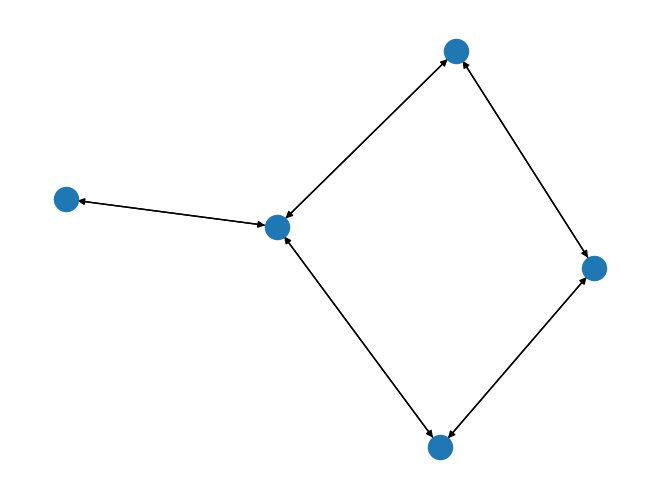

In [34]:

from networkx import connected_components


ug = g.to_undirected()

# for i in list(connected_components(ug)):
#     print(len(i))
    
# print(list(connected_components(ug))[3])
k = g.subgraph(list(connected_components(ug))[3])
print(k)
print(k.nodes)

networkx.draw_spring(k, with_lable = True)
